In [1]:
import torch
import torchvision

In [2]:
from torchvision import datasets, transforms

In [3]:
# define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5,), (0.5,))])


# fetch and load training data
trainset = datasets.KMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False)

    # fetch and load test data
testset = datasets.KMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [4]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [5]:
#this means we have 64 images of 28x28 pixels in grayscale (1 channel)

example_data.shape


torch.Size([64, 1, 28, 28])

In [6]:
example_data.view(example_data.shape[0], -1).shape

torch.Size([64, 784])

In [7]:
import matplotlib.pyplot as plt

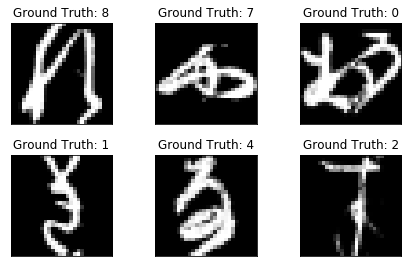

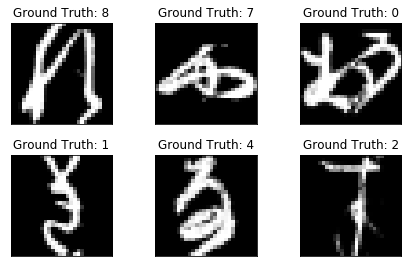

In [9]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [9]:
use_cuda = torch.cuda.is_available()
use_cuda

False

In [10]:
device = torch.device('cuda' if use_cuda else 'cpu')

In [11]:
device

device(type='cpu')

In [10]:
example_data.shape
x = example_data
example_data.shape

torch.Size([64, 1, 28, 28])

In [11]:
x = x.view(x.shape[0], -1)#flatten image into 784x1

In [12]:
x.shape

torch.Size([64, 784])

In [47]:
import pandas as pd
df = pd.read_csv('spirals.csv')

In [48]:
df.head(10)

,x_coord,y_coord,class
0,6.50000,0.00000,0
1,-6.50000,-0.00000,1
2,6.31380,1.25590,0
3,-6.31380,-1.25590,1
4,5.88973,2.43961,0
5,-5.88973,-2.43961,1
6,5.24865,3.50704,0
7,-5.24865,-3.50704,1
8,4.41941,4.41943,0
9,-4.41941,-4.41943,1


In [49]:
data = torch.tensor(df.values,dtype=torch.float32)


In [50]:
data #transform all data into a tensor

tensor([[ 6.5000e+00,  0.0000e+00,  0.0000e+00],
        [-6.5000e+00, -0.0000e+00,  1.0000e+00],
        [ 6.3138e+00,  1.2559e+00,  0.0000e+00],
        [-6.3138e+00, -1.2559e+00,  1.0000e+00],
        [ 5.8897e+00,  2.4396e+00,  0.0000e+00],
        [-5.8897e+00, -2.4396e+00,  1.0000e+00],
        [ 5.2487e+00,  3.5070e+00,  0.0000e+00],
        [-5.2487e+00, -3.5070e+00,  1.0000e+00],
        [ 4.4194e+00,  4.4194e+00,  0.0000e+00],
        [-4.4194e+00, -4.4194e+00,  1.0000e+00],
        [ 3.4376e+00,  5.1447e+00,  0.0000e+00],
        [-3.4376e+00, -5.1447e+00,  1.0000e+00],
        [ 2.3439e+00,  5.6588e+00,  0.0000e+00],
        [-2.3439e+00, -5.6588e+00,  1.0000e+00],
        [ 1.1827e+00,  5.9460e+00,  0.0000e+00],
        [-1.1827e+00, -5.9460e+00,  1.0000e+00],
        [-2.0000e-05,  6.0000e+00,  0.0000e+00],
        [ 2.0000e-05, -6.0000e+00,  1.0000e+00],
        [-1.1584e+00,  5.8234e+00,  0.0000e+00],
        [ 1.1584e+00, -5.8234e+00,  1.0000e+00],
        [-2.2483e+00

In [ ]:
data

In [17]:
num_input = data.shape[1] - 1

In [18]:
num_input # number of features without the target

2

In [19]:
data.shape

torch.Size([194, 3])

In [20]:
#splitting the data
full_input  = data[:,0:num_input]
full_target = data[:,num_input:num_input+1]


In [21]:
full_input #this will be fed in the network

tensor([[ 6.5000e+00,  0.0000e+00],
        [-6.5000e+00, -0.0000e+00],
        [ 6.3138e+00,  1.2559e+00],
        [-6.3138e+00, -1.2559e+00],
        [ 5.8897e+00,  2.4396e+00],
        [-5.8897e+00, -2.4396e+00],
        [ 5.2487e+00,  3.5070e+00],
        [-5.2487e+00, -3.5070e+00],
        [ 4.4194e+00,  4.4194e+00],
        [-4.4194e+00, -4.4194e+00],
        [ 3.4376e+00,  5.1447e+00],
        [-3.4376e+00, -5.1447e+00],
        [ 2.3439e+00,  5.6588e+00],
        [-2.3439e+00, -5.6588e+00],
        [ 1.1827e+00,  5.9460e+00],
        [-1.1827e+00, -5.9460e+00],
        [-2.0000e-05,  6.0000e+00],
        [ 2.0000e-05, -6.0000e+00],
        [-1.1584e+00,  5.8234e+00],
        [ 1.1584e+00, -5.8234e+00],
        [-2.2483e+00,  5.4278e+00],
        [ 2.2483e+00, -5.4278e+00],
        [-3.2293e+00,  4.8329e+00],
        [ 3.2293e+00, -4.8329e+00],
        [-4.0659e+00,  4.0658e+00],
        [ 4.0659e+00, -4.0658e+00],
        [-4.7290e+00,  3.1598e+00],
        [ 4.7290e+00, -3.159

In [22]:
full_target #this will be used for the output loss calc

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
      

In [23]:
train_dataset = torch.utils.data.TensorDataset(full_input,full_target)
train_loader  = torch.utils.data.DataLoader(train_dataset,batch_size=97)

In [24]:
train_dataset #transforming to speed training in pytorch

In [25]:
train_loader

In [51]:
for _, (data_feed,target) in enumerate(train_loader):
    print('x:',data_feed)
    break

x: tensor([[ 6.5000e+00,  0.0000e+00],
        [-6.5000e+00, -0.0000e+00],
        [ 6.3138e+00,  1.2559e+00],
        [-6.3138e+00, -1.2559e+00],
        [ 5.8897e+00,  2.4396e+00],
        [-5.8897e+00, -2.4396e+00],
        [ 5.2487e+00,  3.5070e+00],
        [-5.2487e+00, -3.5070e+00],
        [ 4.4194e+00,  4.4194e+00],
        [-4.4194e+00, -4.4194e+00],
        [ 3.4376e+00,  5.1447e+00],
        [-3.4376e+00, -5.1447e+00],
        [ 2.3439e+00,  5.6588e+00],
        [-2.3439e+00, -5.6588e+00],
        [ 1.1827e+00,  5.9460e+00],
        [-1.1827e+00, -5.9460e+00],
        [-2.0000e-05,  6.0000e+00],
        [ 2.0000e-05, -6.0000e+00],
        [-1.1584e+00,  5.8234e+00],
        [ 1.1584e+00, -5.8234e+00],
        [-2.2483e+00,  5.4278e+00],
        [ 2.2483e+00, -5.4278e+00],
        [-3.2293e+00,  4.8329e+00],
        [ 3.2293e+00, -4.8329e+00],
        [-4.0659e+00,  4.0658e+00],
        [ 4.0659e+00, -4.0658e+00],
        [-4.7290e+00,  3.1598e+00],
        [ 4.7290e+00, -3.

In [27]:
data_feed[0]

tensor([6.5000, 0.0000])

In [52]:
x = data_feed[:,0] # x vector
x

tensor([ 6.5000e+00, -6.5000e+00,  6.3138e+00, -6.3138e+00,  5.8897e+00,
        -5.8897e+00,  5.2487e+00, -5.2487e+00,  4.4194e+00, -4.4194e+00,
         3.4376e+00, -3.4376e+00,  2.3439e+00, -2.3439e+00,  1.1827e+00,
        -1.1827e+00, -2.0000e-05,  2.0000e-05, -1.1584e+00,  1.1584e+00,
        -2.2483e+00,  2.2483e+00, -3.2293e+00,  3.2293e+00, -4.0659e+00,
         4.0659e+00, -4.7290e+00,  4.7290e+00, -5.1968e+00,  5.1968e+00,
        -5.4556e+00,  5.4556e+00, -5.5000e+00,  5.5000e+00, -5.3330e+00,
         5.3330e+00, -4.9658e+00,  4.9658e+00, -4.4172e+00,  4.4172e+00,
        -3.7123e+00,  3.7123e+00, -2.8820e+00,  2.8820e+00, -1.9612e+00,
         1.9612e+00, -9.8759e-01,  9.8759e-01,  6.0000e-05, -6.0000e-05,
         9.6331e-01, -9.6331e-01,  1.8656e+00, -1.8656e+00,  2.6737e+00,
        -2.6737e+00,  3.3588e+00, -3.3588e+00,  3.8976e+00, -3.8976e+00,
         4.2730e+00, -4.2730e+00,  4.4749e+00, -4.4749e+00,  4.5000e+00,
        -4.5000e+00,  4.3522e+00, -4.3522e+00,  4.0

In [53]:
y = data_feed[:,1] # y vector 
y

tensor([ 0.0000e+00, -0.0000e+00,  1.2559e+00, -1.2559e+00,  2.4396e+00,
        -2.4396e+00,  3.5070e+00, -3.5070e+00,  4.4194e+00, -4.4194e+00,
         5.1447e+00, -5.1447e+00,  5.6588e+00, -5.6588e+00,  5.9460e+00,
        -5.9460e+00,  6.0000e+00, -6.0000e+00,  5.8234e+00, -5.8234e+00,
         5.4278e+00, -5.4278e+00,  4.8329e+00, -4.8329e+00,  4.0658e+00,
        -4.0658e+00,  3.1598e+00, -3.1598e+00,  2.1526e+00, -2.1526e+00,
         1.0852e+00, -1.0852e+00, -4.0000e-05,  4.0000e-05, -1.0609e+00,
         1.0609e+00, -2.0570e+00,  2.0570e+00, -2.9515e+00,  2.9515e+00,
        -3.7123e+00,  3.7123e+00, -4.3133e+00,  4.3133e+00, -4.7349e+00,
         4.7349e+00, -4.9652e+00,  4.9652e+00, -5.0000e+00,  5.0000e+00,
        -4.8426e+00,  4.8426e+00, -4.5039e+00,  4.5039e+00, -4.0014e+00,
         4.0014e+00, -3.3587e+00,  3.3587e+00, -2.6042e+00,  2.6042e+00,
        -1.7699e+00,  1.7699e+00, -8.9004e-01,  8.9004e-01,  7.0000e-05,
        -7.0000e-05,  8.6578e-01, -8.6578e-01,  1.6

In [54]:
a = torch.atan2(y,x)

In [55]:
r = torch.sqrt(x*x + y*y)

In [56]:
data_feed.shape

torch.Size([97, 2])

In [57]:
out = torch.zeros(data_feed.shape,dtype=torch.float32)
out[:,0] = a
out[:,1] = r

In [58]:
out

tensor([[ 0.0000e+00,  6.5000e+00],
        [-3.1416e+00,  6.5000e+00],
        [ 1.9635e-01,  6.4375e+00],
        [-2.9452e+00,  6.4375e+00],
        [ 3.9270e-01,  6.3750e+00],
        [-2.7489e+00,  6.3750e+00],
        [ 5.8905e-01,  6.3125e+00],
        [-2.5525e+00,  6.3125e+00],
        [ 7.8540e-01,  6.2500e+00],
        [-2.3562e+00,  6.2500e+00],
        [ 9.8175e-01,  6.1875e+00],
        [-2.1598e+00,  6.1875e+00],
        [ 1.1781e+00,  6.1250e+00],
        [-1.9635e+00,  6.1250e+00],
        [ 1.3744e+00,  6.0625e+00],
        [-1.7671e+00,  6.0625e+00],
        [ 1.5708e+00,  6.0000e+00],
        [-1.5708e+00,  6.0000e+00],
        [ 1.7671e+00,  5.9375e+00],
        [-1.3744e+00,  5.9375e+00],
        [ 1.9635e+00,  5.8750e+00],
        [-1.1781e+00,  5.8750e+00],
        [ 2.1599e+00,  5.8125e+00],
        [-9.8174e-01,  5.8125e+00],
        [ 2.3562e+00,  5.7500e+00],
        [-7.8539e-01,  5.7500e+00],
        [ 2.5525e+00,  5.6875e+00],
        [-5.8904e-01,  5.687

In [37]:
xrange = torch.arange(start=-7,end=7.1,step=0.01,dtype=torch.float32)
yrange = torch.arange(start=-6.6,end=6.7,step=0.01,dtype=torch.float32)
xcoord = xrange.repeat(yrange.size()[0])

In [38]:
xrange

tensor([-7.0000, -6.9900, -6.9800,  ...,  7.0700,  7.0800,  7.0900])

In [39]:
yrange

tensor([-6.6000, -6.5900, -6.5800,  ...,  6.6700,  6.6800,  6.6900])

In [40]:
yrange.size()

torch.Size([1330])

In [41]:
xcoord.unsqueeze(1)

tensor([[-7.0000],
        [-6.9900],
        [-6.9800],
        ...,
        [ 7.0700],
        [ 7.0800],
        [ 7.0900]])

In [42]:
xcoord = xrange.repeat(yrange.size()[0])
ycoord = torch.repeat_interleave(yrange, xrange.size()[0], dim=0)
grid = torch.cat((xcoord.unsqueeze(1),ycoord.unsqueeze(1)),1)

In [43]:
xcoord

tensor([-7.0000, -6.9900, -6.9800,  ...,  7.0700,  7.0800,  7.0900])

In [44]:
ycoord

tensor([-6.6000, -6.6000, -6.6000,  ...,  6.6900,  6.6900,  6.6900])

In [45]:
grid

tensor([[-7.0000, -6.6000],
        [-6.9900, -6.6000],
        [-6.9800, -6.6000],
        ...,
        [ 7.0700,  6.6900],
        [ 7.0800,  6.6900],
        [ 7.0900,  6.6900]])

In [29]:
# plot hidden layer
#first define the class
import torch.nn as nn
import torch.nn.functional as F
class RawNet(torch.nn.Module):
    def __init__(self, num_hid):
        super(RawNet, self).__init__()
        self.feed = nn.Linear(2,num_hid)
        self.hid = nn.Linear(num_hid,num_hid)
        self.out = nn.Linear(num_hid,1)


    def forward(self, x):
        self.active1 = torch.tanh(self.feed(x))
        self.active2 = torch.tanh(self.hid(self.active1))
        self.hidlayer = [self.active1,self.active2]
        output = torch.sigmoid(self.out(self.active2))
        return output

In [30]:
def train(net, train_loader, optimizer):
    total=0
    correct=0
    for _, (data,target) in enumerate(train_loader):
        optimizer.zero_grad()    # zero the gradients
        output = net(data)       # apply network
        loss = F.binary_cross_entropy(output,target)
        loss.backward()          # compute gradients
        optimizer.step()         # update weights
        pred = (output >= 0.5).float()
        correct += (pred == target).float().sum()
        total += target.size()[0]
        accuracy = 100*correct/total

    if epoch % 100 == 0:
        print('ep:%5d loss: %6.4f acc: %5.2f' %
             (epoch,loss.item(),accuracy))

    return accuracy

In [31]:
data

tensor([[ 6.5000e+00,  0.0000e+00,  0.0000e+00],
        [-6.5000e+00, -0.0000e+00,  1.0000e+00],
        [ 6.3138e+00,  1.2559e+00,  0.0000e+00],
        [-6.3138e+00, -1.2559e+00,  1.0000e+00],
        [ 5.8897e+00,  2.4396e+00,  0.0000e+00],
        [-5.8897e+00, -2.4396e+00,  1.0000e+00],
        [ 5.2487e+00,  3.5070e+00,  0.0000e+00],
        [-5.2487e+00, -3.5070e+00,  1.0000e+00],
        [ 4.4194e+00,  4.4194e+00,  0.0000e+00],
        [-4.4194e+00, -4.4194e+00,  1.0000e+00],
        [ 3.4376e+00,  5.1447e+00,  0.0000e+00],
        [-3.4376e+00, -5.1447e+00,  1.0000e+00],
        [ 2.3439e+00,  5.6588e+00,  0.0000e+00],
        [-2.3439e+00, -5.6588e+00,  1.0000e+00],
        [ 1.1827e+00,  5.9460e+00,  0.0000e+00],
        [-1.1827e+00, -5.9460e+00,  1.0000e+00],
        [-2.0000e-05,  6.0000e+00,  0.0000e+00],
        [ 2.0000e-05, -6.0000e+00,  1.0000e+00],
        [-1.1584e+00,  5.8234e+00,  0.0000e+00],
        [ 1.1584e+00, -5.8234e+00,  1.0000e+00],
        [-2.2483e+00

In [32]:
def graph_output(net):
    xrange = torch.arange(start=-7,end=7.1,step=0.01,dtype=torch.float32)
    yrange = torch.arange(start=-6.6,end=6.7,step=0.01,dtype=torch.float32)
    xcoord = xrange.repeat(yrange.size()[0])
    ycoord = torch.repeat_interleave(yrange, xrange.size()[0], dim=0)
    grid = torch.cat((xcoord.unsqueeze(1),ycoord.unsqueeze(1)),1)
    with torch.no_grad(): # suppress updating of gradients
        net.eval()        # toggle batch norm, dropout
        output = net(grid)
        net.train() # toggle batch norm, dropout back again

        pred = (output >= 0.5).float()

        # plot function computed by model
        plt.clf()
        plt.pcolormesh(xrange,yrange,pred.cpu().view(yrange.size()[0],xrange.size()[0]), cmap='Wistia')

In [33]:
def graph_hidden(net, layer, node):
    print("node:",node)
    print("layer:",layer)
    plt.clf()


In [62]:
from numpy import arange
p = [j for j in arange(.1,2,.1)]
p

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3000000000000003,
 1.4000000000000001,
 1.5000000000000002,
 1.6,
 1.7000000000000002,
 1.8000000000000003,
 1.9000000000000001]

In [63]:
num_input = data.shape[1] - 1

full_input  = data[:,0:num_input]
full_target = data[:,num_input:num_input+1]

train_dataset = torch.utils.data.TensorDataset(full_input,full_target)
train_loader  = torch.utils.data.DataLoader(train_dataset,batch_size=97)

epoch = 20000
y_epoch_converge = []
x_init_vals = []
z_accuracy = []
for init in p:
    net = RawNet(10)

    if list(net.parameters()):
        # initialize weight values
        for m in list(net.parameters()):
            m.data.normal_(0,init)

        # use Adam optimizer
        optimizer = torch.optim.Adam(net.parameters(),eps=0.000001,lr=.01,
                                     betas=(0.9,0.999),weight_decay=0.0001)
        # training loop
        for epoch in range(1, epoch):
            accuracy = train(net, train_loader, optimizer)
            if accuracy == 100:
                print("Achieves 100%")
                break

    y_epoch_converge.append(epoch)
    x_init_vals.append(init)
    z_accuracy.append(accuracy)
    print(f"init:{init}, acc:{accuracy} , epoch:{epoch}")


ep:  100 loss: 0.7124 acc: 50.52
ep:  200 loss: 0.7125 acc: 50.00
ep:  300 loss: 0.7126 acc: 50.00
ep:  400 loss: 0.7127 acc: 50.00
ep:  500 loss: 0.7127 acc: 50.00
ep:  600 loss: 0.7127 acc: 50.00
ep:  700 loss: 0.7128 acc: 50.00
ep:  800 loss: 0.7128 acc: 50.00
ep:  900 loss: 0.7128 acc: 50.00
ep: 1000 loss: 0.7128 acc: 50.00
ep: 1100 loss: 0.7128 acc: 50.00
ep: 1200 loss: 0.7128 acc: 50.00
ep: 1300 loss: 0.7128 acc: 50.00
ep: 1400 loss: 0.7128 acc: 50.00
ep: 1500 loss: 0.7128 acc: 50.00
ep: 1600 loss: 0.7128 acc: 50.00
ep: 1700 loss: 0.7128 acc: 50.00
ep: 1800 loss: 0.7128 acc: 50.00
ep: 1900 loss: 0.7128 acc: 50.00
ep: 2000 loss: 0.7128 acc: 50.00
ep: 2100 loss: 0.7128 acc: 50.52
ep: 2200 loss: 0.7128 acc: 50.52
ep: 2300 loss: 0.7128 acc: 50.52
ep: 2400 loss: 0.7128 acc: 50.52
ep: 2500 loss: 0.7128 acc: 50.52
ep: 2600 loss: 0.7128 acc: 50.52
ep: 2700 loss: 0.7128 acc: 50.52
ep: 2800 loss: 0.7128 acc: 50.52
ep: 2900 loss: 0.7128 acc: 50.52
ep: 3000 loss: 0.7128 acc: 50.52
ep: 3100 l

ep: 4900 loss: 0.0353 acc: 85.57
ep: 5000 loss: 0.0322 acc: 86.60
ep: 5100 loss: 0.0306 acc: 88.66
ep: 5200 loss: 0.0284 acc: 88.66
ep: 5300 loss: 0.0266 acc: 86.60
ep: 5400 loss: 0.0251 acc: 86.60
ep: 5500 loss: 0.0239 acc: 86.60
ep: 5600 loss: 0.0228 acc: 87.63
ep: 5700 loss: 0.0220 acc: 88.66
ep: 5800 loss: 0.0210 acc: 92.78
ep: 5900 loss: 0.0189 acc: 91.75
ep: 6000 loss: 0.0195 acc: 92.27
ep: 6100 loss: 0.0186 acc: 91.24
ep: 6200 loss: 0.0172 acc: 91.75
ep: 6300 loss: 0.0167 acc: 90.72
ep: 6400 loss: 0.0178 acc: 92.27
ep: 6500 loss: 0.0211 acc: 96.91
ep: 6600 loss: 0.0251 acc: 95.88
Achieves 100%
init:0.2, acc:100.0 , epoch:6635
ep:  100 loss: 0.6829 acc: 61.86
ep:  200 loss: 0.6649 acc: 62.89
ep:  300 loss: 0.6469 acc: 60.31
ep:  400 loss: 0.6183 acc: 52.06
ep:  500 loss: 0.5561 acc: 58.76
ep:  600 loss: 0.4692 acc: 59.79
ep:  700 loss: 0.4006 acc: 62.37
ep:  800 loss: 0.3558 acc: 66.49
ep:  900 loss: 0.3309 acc: 70.10
ep: 1000 loss: 0.3146 acc: 71.13
ep: 1100 loss: 0.3036 acc: 70

ep: 2800 loss: 0.1033 acc: 80.41
ep: 2900 loss: 0.1009 acc: 79.90
ep: 3000 loss: 0.0986 acc: 79.38
ep: 3100 loss: 0.0963 acc: 79.90
ep: 3200 loss: 0.0941 acc: 80.41
ep: 3300 loss: 0.0924 acc: 80.41
ep: 3400 loss: 0.0911 acc: 80.41
ep: 3500 loss: 0.0901 acc: 80.41
ep: 3600 loss: 0.0898 acc: 81.44
ep: 3700 loss: 0.0911 acc: 82.99
ep: 3800 loss: 0.0899 acc: 82.47
ep: 3900 loss: 0.0880 acc: 84.54
ep: 4000 loss: 0.0860 acc: 82.99
ep: 4100 loss: 0.0832 acc: 84.02
ep: 4200 loss: 0.0802 acc: 83.51
ep: 4300 loss: 0.0777 acc: 84.02
ep: 4400 loss: 0.0755 acc: 84.02
ep: 4500 loss: 0.0736 acc: 84.02
ep: 4600 loss: 0.0720 acc: 84.02
ep: 4700 loss: 0.0707 acc: 84.02
ep: 4800 loss: 0.0695 acc: 84.54
ep: 4900 loss: 0.0686 acc: 84.54
ep: 5000 loss: 0.0677 acc: 85.05
ep: 5100 loss: 0.0670 acc: 85.05
ep: 5200 loss: 0.0664 acc: 85.05
ep: 5300 loss: 0.0659 acc: 85.57
ep: 5400 loss: 0.0654 acc: 85.57
ep: 5500 loss: 0.0648 acc: 86.08
ep: 5600 loss: 0.0643 acc: 86.08
ep: 5700 loss: 0.0639 acc: 86.08
ep: 5800 l

ep:  700 loss: 0.3807 acc: 68.56
ep:  800 loss: 0.3462 acc: 69.07
ep:  900 loss: 0.3167 acc: 69.59
ep: 1000 loss: 0.2966 acc: 70.62
ep: 1100 loss: 0.2800 acc: 73.20
ep: 1200 loss: 0.2609 acc: 72.68
ep: 1300 loss: 0.2430 acc: 73.71
ep: 1400 loss: 0.2269 acc: 73.71
ep: 1500 loss: 0.2134 acc: 74.74
ep: 1600 loss: 0.2026 acc: 77.32
ep: 1700 loss: 0.1944 acc: 75.26
ep: 1800 loss: 0.1880 acc: 75.26
ep: 1900 loss: 0.1821 acc: 77.84
ep: 2000 loss: 0.1772 acc: 79.38
ep: 2100 loss: 0.1758 acc: 81.96
ep: 2200 loss: 0.1691 acc: 83.51
ep: 2300 loss: 0.1657 acc: 82.47
ep: 2400 loss: 0.1616 acc: 85.57
ep: 2500 loss: 0.1572 acc: 87.63
ep: 2600 loss: 0.1528 acc: 87.63
ep: 2700 loss: 0.1482 acc: 87.11
ep: 2800 loss: 0.1430 acc: 87.63
ep: 2900 loss: 0.1387 acc: 87.63
ep: 3000 loss: 0.1338 acc: 87.63
ep: 3100 loss: 0.1291 acc: 88.66
ep: 3200 loss: 0.1250 acc: 88.66
ep: 3300 loss: 0.1213 acc: 88.66
ep: 3400 loss: 0.1194 acc: 89.69
ep: 3500 loss: 0.1174 acc: 90.21
ep: 3600 loss: 0.1153 acc: 90.21
ep: 3700 l

ep: 5300 loss: 0.0922 acc: 91.75
ep: 5400 loss: 0.0912 acc: 91.75
ep: 5500 loss: 0.0900 acc: 92.27
ep: 5600 loss: 0.0888 acc: 92.27
ep: 5700 loss: 0.0878 acc: 92.27
ep: 5800 loss: 0.0866 acc: 92.27
ep: 5900 loss: 0.0857 acc: 92.27
ep: 6000 loss: 0.0849 acc: 92.27
ep: 6100 loss: 0.0841 acc: 92.27
ep: 6200 loss: 0.0835 acc: 92.78
ep: 6300 loss: 0.0829 acc: 92.78
ep: 6400 loss: 0.0824 acc: 92.78
ep: 6500 loss: 0.0819 acc: 92.78
ep: 6600 loss: 0.0814 acc: 92.78
init:1.3000000000000003, acc:92.78350830078125 , epoch:6624
ep:  100 loss: 0.5693 acc: 62.37
ep:  200 loss: 0.4984 acc: 65.98
ep:  300 loss: 0.4398 acc: 69.59
ep:  400 loss: 0.3964 acc: 72.68
ep:  500 loss: 0.3634 acc: 72.68
ep:  600 loss: 0.3345 acc: 72.68
ep:  700 loss: 0.3064 acc: 74.23
ep:  800 loss: 0.2794 acc: 75.26
ep:  900 loss: 0.2563 acc: 76.29
ep: 1000 loss: 0.2382 acc: 79.38
ep: 1100 loss: 0.2180 acc: 79.90
ep: 1200 loss: 0.2029 acc: 81.44
ep: 1300 loss: 0.1912 acc: 82.99
ep: 1400 loss: 0.1728 acc: 84.54
ep: 1500 loss: 0

ep: 3100 loss: 0.1511 acc: 82.47
ep: 3200 loss: 0.1479 acc: 81.96
ep: 3300 loss: 0.1460 acc: 83.51
ep: 3400 loss: 0.1438 acc: 82.47
ep: 3500 loss: 0.1420 acc: 82.99
ep: 3600 loss: 0.1374 acc: 86.08
ep: 3700 loss: 0.1346 acc: 86.08
ep: 3800 loss: 0.1301 acc: 86.08
ep: 3900 loss: 0.1259 acc: 85.05
ep: 4000 loss: 0.1227 acc: 85.57
ep: 4100 loss: 0.1201 acc: 85.05
ep: 4200 loss: 0.1180 acc: 85.05
ep: 4300 loss: 0.1161 acc: 84.54
ep: 4400 loss: 0.1145 acc: 85.05
ep: 4500 loss: 0.1131 acc: 85.05
ep: 4600 loss: 0.1119 acc: 85.05
ep: 4700 loss: 0.1108 acc: 85.57
ep: 4800 loss: 0.1098 acc: 85.57
ep: 4900 loss: 0.1089 acc: 85.57
ep: 5000 loss: 0.1080 acc: 85.57
ep: 5100 loss: 0.1072 acc: 85.57
ep: 5200 loss: 0.1064 acc: 85.05
ep: 5300 loss: 0.1057 acc: 85.57
ep: 5400 loss: 0.1051 acc: 85.57
ep: 5500 loss: 0.1045 acc: 85.57
ep: 5600 loss: 0.1040 acc: 85.57
ep: 5700 loss: 0.1035 acc: 85.57
ep: 5800 loss: 0.1031 acc: 86.08
ep: 5900 loss: 0.1026 acc: 86.08
ep: 6000 loss: 0.1022 acc: 86.60
ep: 6100 l

In [38]:
y_epoch_converge

[6683, 6682, 6681, 6680, 6679, 6678, 6677, 6676, 6675]

In [39]:
x_init_vals

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9]

Text(0, 0.5, 'epoch')

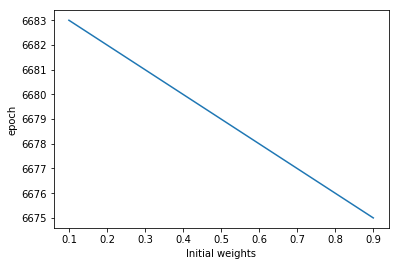

In [61]:
plt.plot(x_init_vals,y_epoch_converge)
plt.xlabel('Initial weights')
plt.ylabel('epoch')

In [53]:
net.active1[:,0].shape

torch.Size([97])

In [54]:
with torch.no_grad():
    print(net.active1[:,0].shape)
    net.eval() 
    print(net.active1[:,0].shape)
    output = net(grid)
    print(net.active1[:,0].shape[0])

torch.Size([97])
torch.Size([97])
1875300


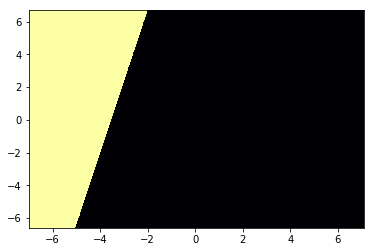

In [55]:
with torch.no_grad(): # suppress updating of gradients
    # plot function computed by model
    net.eval()
    net(grid)
    hid = net.hidlayer[0]
    pred = (hid[:,0].view(hid.shape[0],1) >= 0.5).float()
    plt.clf()
    plt.pcolormesh(xrange,yrange,pred.cpu().view(yrange.size()[0],xrange.size()[0]), cmap='inferno')


In [56]:
output.shape

torch.Size([1875300, 1])

In [57]:
net.active1[:,0]

tensor([ 0.6938,  0.6930,  0.6921,  ..., -0.6984, -0.6992, -0.6999])

In [58]:
 with torch.no_grad(): # suppress updating of gradients
    net.eval()        # toggle batch norm, dropout
    output = net(grid)
    net.train() # toggle batch norm, dropout back again

    pred = (output >= 0.5).float()
    
pred.shape        

torch.Size([1875300, 1])

In [59]:
xrange

tensor([-7.0000, -6.9900, -6.9800,  ...,  7.0700,  7.0800,  7.0900])

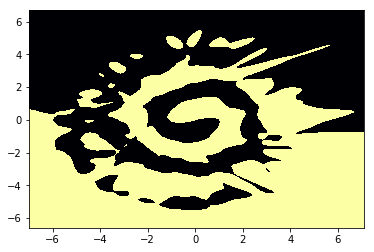

In [60]:
plt.clf()
plt.pcolormesh(xrange,yrange,pred.cpu().view(yrange.size()[0],xrange.size()[0]), cmap='inferno')

In [61]:
net.active1.cpu().view(yrange.size()[0],xrange.size()[0])

RuntimeError: shape '[1330, 1410]' is invalid for input of size 937650000

In [ ]:
net.active1[:,0].shape

In [ ]:
net.active1[:,0].sum()

In [ ]:
pred = (net.active1[:,0] >= 0.5).float()

In [ ]:
pred.shape

In [42]:

class PolarNet(torch.nn.Module):
    def __init__(self, num_hid):
        super(PolarNet, self).__init__()
        self.feed = nn.Linear(2,num_hid) 
        self.hid = nn.Linear(num_hid,1)

    def forward(self, input):
        x = input[:,0]
        y = input[:,1]
        out = torch.zeros(input.shape,dtype=torch.float32)
        out[:,0] = torch.sqrt(x*x + y*y) #tranform data
        out[:,1] = torch.atan2(y,x)
        #here we start the forward pass
        self.active1 = torch.tanh(self.feed(out))
        self.active2 = torch.tanh(self.hid(self.active1))
        self.hidlayer = [self.active1]
        return F.sigmoid(self.active2)

In [46]:
num_input = data.shape[1] - 1

full_input  = data[:,0:num_input]
full_target = data[:,num_input:num_input+1]

train_dataset = torch.utils.data.TensorDataset(full_input,full_target)
train_loader  = torch.utils.data.DataLoader(train_dataset,batch_size=97)

epoch = 20000
converge = False
hid_layers = 15
while not converge:
    net = PolarNet(hid_layers)
    if list(net.parameters()):
        # initialize weight values
        for m in list(net.parameters()):
            m.data.normal_(0,.1)
        # use Adam optimizer
        optimizer = torch.optim.Adam(net.parameters(),eps=0.000001,lr=.01,
                                     betas=(0.9,0.999),weight_decay=0.0001)
        # training loop
        for epoch in range(1, epoch):
            accuracy = train(net, train_loader, optimizer)
            if accuracy == 100:
                print(f"converged:{hid_layers}")
                converge = True
                break
    print(f"hidden:{hid_layers}, acc:{accuracy} , epoch:{epoch}")
    hid_layers += 1
print(f"Done with task!, found optimal : {hid_layers - 1}")

ep:  100 loss: 0.6552 acc: 62.37
ep:  200 loss: 0.5080 acc: 66.49
ep:  300 loss: 0.4440 acc: 67.53
ep:  400 loss: 0.3876 acc: 76.29
ep:  500 loss: 0.3642 acc: 76.29
ep:  600 loss: 0.3554 acc: 75.77
ep:  700 loss: 0.3514 acc: 75.77
ep:  800 loss: 0.3494 acc: 75.26
ep:  900 loss: 0.3483 acc: 75.26
ep: 1000 loss: 0.3480 acc: 75.26
ep: 1100 loss: 0.3476 acc: 75.26
ep: 1200 loss: 0.3471 acc: 75.26
ep: 1300 loss: 0.3464 acc: 75.77
ep: 1400 loss: 0.3481 acc: 77.84
ep: 1500 loss: 0.3387 acc: 82.99
ep: 1600 loss: 0.3363 acc: 90.21
ep: 1700 loss: 0.3340 acc: 90.72
ep: 1800 loss: 0.3325 acc: 91.24
ep: 1900 loss: 0.3319 acc: 98.45
ep: 2000 loss: 0.3308 acc: 99.48
ep: 2100 loss: 0.3294 acc: 99.48
ep: 2200 loss: 0.3283 acc: 99.48
ep: 2300 loss: 0.3277 acc: 99.48
ep: 2400 loss: 0.3273 acc: 99.48
ep: 2500 loss: 0.3270 acc: 99.48
ep: 2600 loss: 0.3267 acc: 99.48
ep: 2700 loss: 0.3266 acc: 99.48
ep: 2800 loss: 0.3265 acc: 99.48
ep: 2900 loss: 0.3264 acc: 99.48
ep: 3000 loss: 0.3263 acc: 99.48
ep: 3100 l

ep: 4900 loss: 0.3260 acc: 99.48
ep: 5000 loss: 0.3260 acc: 99.48
ep: 5100 loss: 0.3261 acc: 99.48
ep: 5200 loss: 0.3259 acc: 99.48
ep: 5300 loss: 0.3259 acc: 99.48
ep: 5400 loss: 0.3259 acc: 99.48
ep: 5500 loss: 0.3259 acc: 99.48
ep: 5600 loss: 0.3259 acc: 99.48
ep: 5700 loss: 0.3259 acc: 99.48
ep: 5800 loss: 0.3260 acc: 99.48
ep: 5900 loss: 0.3259 acc: 99.48
ep: 6000 loss: 0.3259 acc: 99.48
ep: 6100 loss: 0.3259 acc: 99.48
ep: 6200 loss: 0.3259 acc: 99.48
ep: 6300 loss: 0.3259 acc: 99.48
ep: 6400 loss: 0.3260 acc: 99.48
ep: 6500 loss: 0.3259 acc: 99.48
ep: 6600 loss: 0.3260 acc: 99.48
ep: 6700 loss: 0.3260 acc: 99.48
ep: 6800 loss: 0.3260 acc: 99.48
ep: 6900 loss: 0.3260 acc: 99.48
ep: 7000 loss: 0.3260 acc: 99.48
ep: 7100 loss: 0.3259 acc: 99.48
ep: 7200 loss: 0.3259 acc: 99.48
ep: 7300 loss: 0.3259 acc: 99.48
ep: 7400 loss: 0.3259 acc: 99.48
ep: 7500 loss: 0.3259 acc: 99.48
ep: 7600 loss: 0.3259 acc: 99.48
ep: 7700 loss: 0.3259 acc: 99.48
ep: 7800 loss: 0.3259 acc: 99.48
ep: 7900 l

ep: 9700 loss: 0.3260 acc: 99.48
ep: 9800 loss: 0.3260 acc: 99.48
ep: 9900 loss: 0.3260 acc: 99.48
ep:10000 loss: 0.3259 acc: 99.48
ep:10100 loss: 0.3259 acc: 99.48
ep:10200 loss: 0.3259 acc: 99.48
ep:10300 loss: 0.3259 acc: 99.48
ep:10400 loss: 0.3256 acc: 99.48
ep:10500 loss: 0.3258 acc: 99.48
ep:10600 loss: 0.3258 acc: 99.48
ep:10700 loss: 0.3258 acc: 99.48
ep:10800 loss: 0.3259 acc: 99.48
ep:10900 loss: 0.3259 acc: 99.48
ep:11000 loss: 0.3259 acc: 99.48
ep:11100 loss: 0.3259 acc: 99.48
ep:11200 loss: 0.3259 acc: 99.48
ep:11300 loss: 0.3259 acc: 99.48
ep:11400 loss: 0.3259 acc: 99.48
ep:11500 loss: 0.3259 acc: 99.48
ep:11600 loss: 0.3259 acc: 99.48
ep:11700 loss: 0.3259 acc: 99.48
ep:11800 loss: 0.3259 acc: 99.48
ep:11900 loss: 0.3259 acc: 99.48
ep:12000 loss: 0.3259 acc: 99.48
ep:12100 loss: 0.3259 acc: 99.48
ep:12200 loss: 0.3259 acc: 99.48
ep:12300 loss: 0.3259 acc: 99.48
ep:12400 loss: 0.3259 acc: 99.48
ep:12500 loss: 0.3259 acc: 99.48
ep:12600 loss: 0.3259 acc: 99.48
ep:12700 l

ep:14500 loss: 0.3258 acc: 99.48
ep:14600 loss: 0.3259 acc: 99.48
ep:14700 loss: 0.3259 acc: 99.48
ep:14800 loss: 0.3259 acc: 99.48
ep:14900 loss: 0.3259 acc: 99.48
ep:15000 loss: 0.3259 acc: 99.48
ep:15100 loss: 0.3259 acc: 99.48
ep:15200 loss: 0.3259 acc: 99.48
ep:15300 loss: 0.3259 acc: 99.48
ep:15400 loss: 0.3259 acc: 99.48
ep:15500 loss: 0.3259 acc: 99.48
ep:15600 loss: 0.3259 acc: 99.48
ep:15700 loss: 0.3259 acc: 99.48
ep:15800 loss: 0.3259 acc: 99.48
ep:15900 loss: 0.3259 acc: 99.48
ep:16000 loss: 0.3259 acc: 99.48
ep:16100 loss: 0.3259 acc: 99.48
ep:16200 loss: 0.3259 acc: 99.48
ep:16300 loss: 0.3259 acc: 99.48
ep:16400 loss: 0.3260 acc: 99.48
ep:16500 loss: 0.3259 acc: 99.48
ep:16600 loss: 0.3259 acc: 99.48
ep:16700 loss: 0.3259 acc: 99.48
ep:16800 loss: 0.3259 acc: 99.48
ep:16900 loss: 0.3259 acc: 99.48
ep:17000 loss: 0.3259 acc: 99.48
ep:17100 loss: 0.3259 acc: 99.48
ep:17200 loss: 0.3259 acc: 99.48
ep:17300 loss: 0.3259 acc: 99.48
ep:17400 loss: 0.3259 acc: 99.48
ep:17500 l

In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

In [7]:
star16 = torch.Tensor(
    [[1,1,0,0,0,0,0,0],
     [0,1,1,0,0,0,0,0],
     [0,0,1,1,0,0,0,0],
     [0,0,0,1,1,0,0,0],
     [0,0,0,0,1,1,0,0],
     [0,0,0,0,0,1,1,0],
     [0,0,0,0,0,0,1,1],
     [1,0,0,0,0,0,0,1],
     [1,1,0,0,0,0,0,1],
     [1,1,1,0,0,0,0,0],
     [0,1,1,1,0,0,0,0],
     [0,0,1,1,1,0,0,0],
     [0,0,0,1,1,1,0,0],
     [0,0,0,0,1,1,1,0],
     [0,0,0,0,0,1,1,1],
     [1,0,0,0,0,0,1,1]])


In [9]:
target = star16
num_in  = target.size()[0]
num_out = target.size()[1]

# input is one-hot with same number of rows as target
input = torch.eye(num_in)

In [12]:
input.size()

torch.Size([16, 16])

In [13]:
star16.size()

torch.Size([16, 8])

In [14]:
heart18 =  torch.Tensor([
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,1,0,0,0,0,0,1,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1]
])

In [18]:
target = heart18
num_in  = target.size()[0]
num_out = target.size()[1]

# input is one-hot with same number of rows as target
input = torch.eye(num_in)

In [20]:
input.size()
input

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0.,